In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

1. Load the dataset

In [ ]:
iris_data = pd.read_csv('/content/IRIS.csv')

**2. Quick dataset summary**

2.0 Do we have missing data?

In [ ]:
# my personal reusable function for detecting missing data
def missing_value_describe(data):
    # check missing values in training data
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Number of columns with missing values:", missing_value_col_count)
    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):")
        print(missing_value_stats)
    else:
        print("No misisng data!!!")
missing_value_describe(iris_data)

Number of columns with missing values: 0
No misisng data!!!


In [ ]:
# take a peek
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


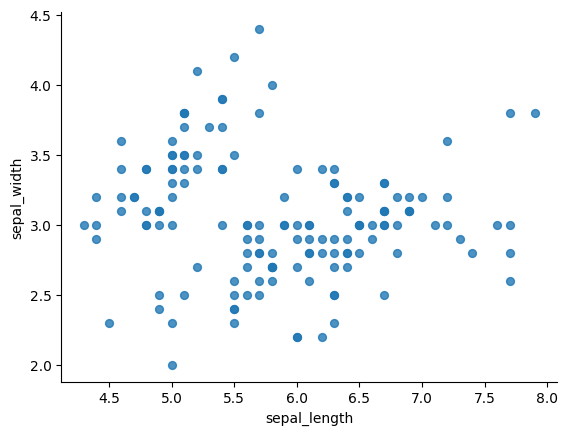

In [ ]:
# @title sepal_length vs sepal_width

from matplotlib import pyplot as plt
iris_data.plot(kind='scatter', x='sepal_length', y='sepal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

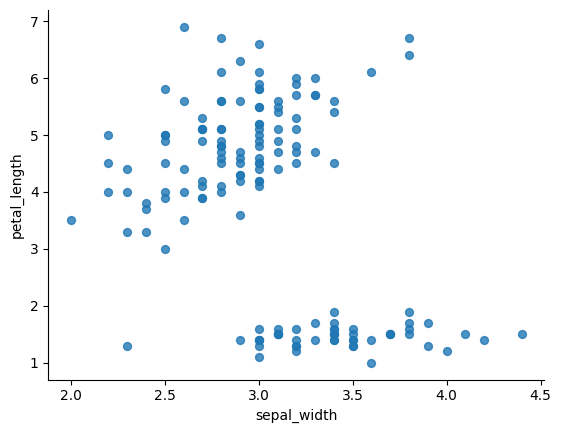

In [ ]:
# @title sepal_width vs petal_length

from matplotlib import pyplot as plt
iris_data.plot(kind='scatter', x='sepal_width', y='petal_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

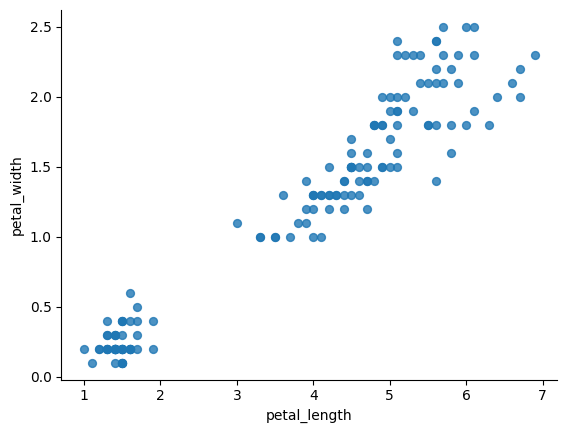

In [ ]:
# @title petal_length vs petal_width

from matplotlib import pyplot as plt
iris_data.plot(kind='scatter', x='petal_length', y='petal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

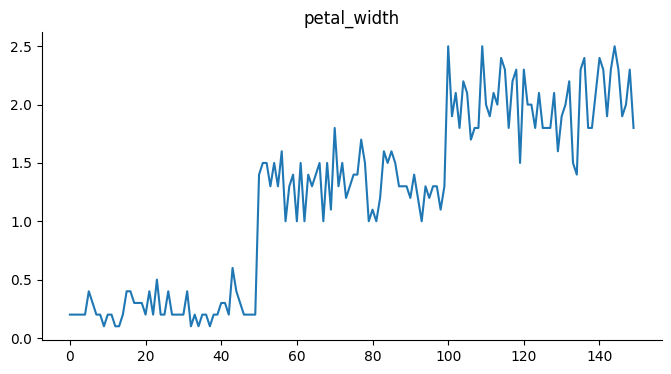

In [ ]:
# @title petal_width

from matplotlib import pyplot as plt
iris_data['petal_width'].plot(kind='line', figsize=(8, 4), title='petal_width')
plt.gca().spines[['top', 'right']].set_visible(False)

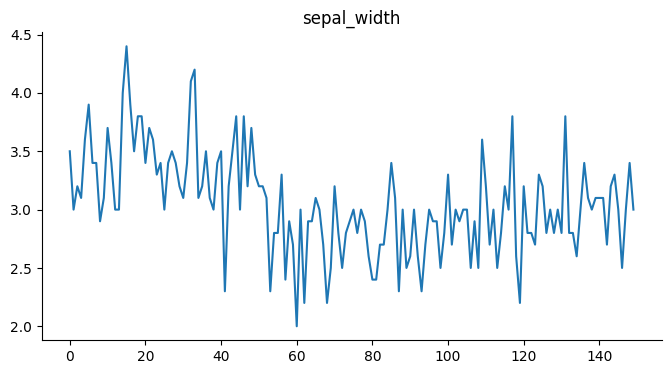

In [ ]:
# @title sepal_width

from matplotlib import pyplot as plt
iris_data['sepal_width'].plot(kind='line', figsize=(8, 4), title='sepal_width')
plt.gca().spines[['top', 'right']].set_visible(False)

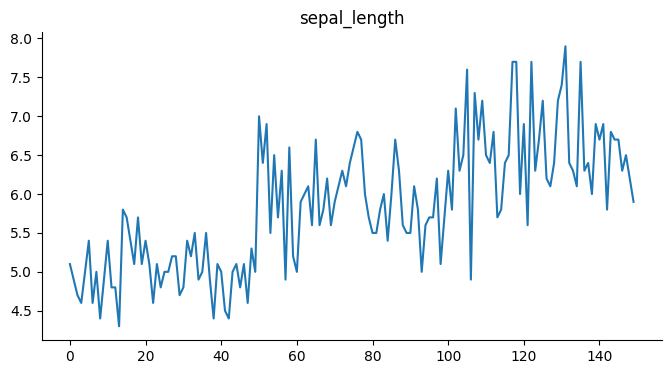

In [ ]:
# @title sepal_length

from matplotlib import pyplot as plt
iris_data['sepal_length'].plot(kind='line', figsize=(8, 4), title='sepal_length')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
iris_data = iris_data.drop(['index'], axis=1)
iris_data.columns

KeyError: "['index'] not found in axis"

Id is the unique identifier for each flower. In this machine learning project, it will not help with our model's training and testing. Let's drop the Id column first

In [ ]:
# Try to drop the column assuming it is named 'Unnamed: 0'
# If this doesn't work, it means the column has a different name or it's the DataFrame's index.
iris_data = iris_data.drop(['Unnamed: 0'], axis=1, errors='ignore')

# Alternatively, if you want to drop the DataFrame's index, reset it first and then drop:
# iris_data = iris_data.reset_index()
# iris_data = iris_data.drop(['index'], axis=1)

iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

From the printed column names, we can see the "Id" column is dropped now.

**2.1 Dimension of the dataset**

In [ ]:
# dimension
print("the dimension:", iris_data.shape)

the dimension: (150, 5)


We can see we have a dataset with 150 observations and each observation has 6 columns.

4 of the columns are numeric attributes we can use to train machine learning models and the last column is the label of a given flower.

**2.2 Statistical summary using .describe()**

In [ ]:
print(iris_data.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Let's interpret the above statistical desciption of our dataset:

The descriptoin shows we have data with super low std(standard deviation)

the range of the SepalLengthCm is: 4.300000 - 7.900000

the range of the SepalWidthCm is: 2.000000 - 4.400000

the range of the PetalLengthCm is: 1.000000 - 6.900000

the range of the PetalWidthCm is: 0.100000 - 2.500000

**2.3 Distribution of each class?**

Since we are predicting the class of a given flower, let's exam what's the class distribution for this dataset

In [ ]:
# class distribution
print(iris_data.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


**3. Explore data with visualization**

In [ ]:
# import ploting tool
import matplotlib.pyplot as plt

3.1 Let's visualize the distribution:

Text(0, 0.5, 'count')

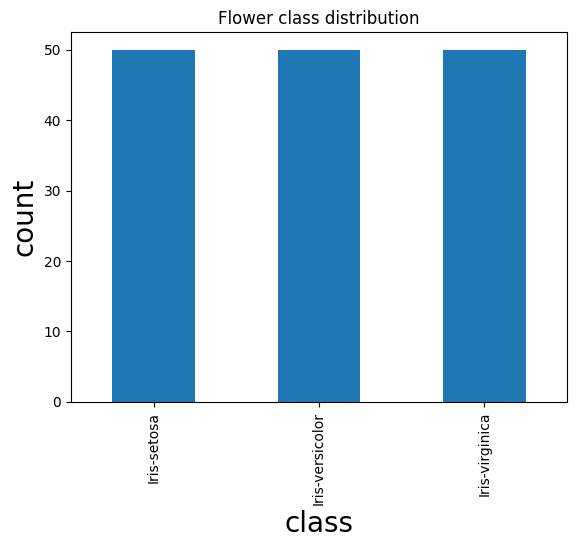

In [ ]:
# iris flower dataset class distribution
nameplot = iris_data['species'].value_counts().plot.bar(title='Flower class distribution')
nameplot.set_xlabel('class',size=20)
nameplot.set_ylabel('count',size=20)

From the above visualization and the summary, we can see each class has equal distribution in the dataset. It's very "ideal" in machine learning project.

**3.2 Box and Whisker plot:**

We will use it see how the values are distributed in each attribute

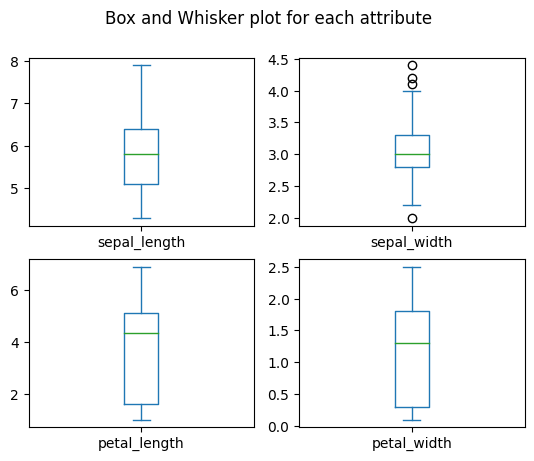

In [ ]:
# box and whisker plots
iris_data.plot(kind='box', subplots=True, layout=(2,2),
               sharex=False, sharey=False, title="Box and Whisker plot for each attribute")
plt.show()

**3.3 Histogram:**

Histogram is an very important tool to help visualize the dataset's value distribution.

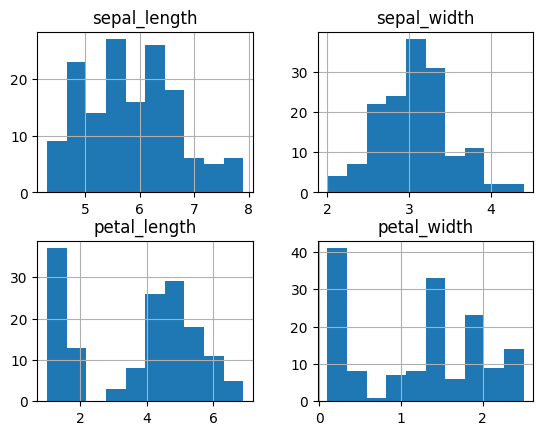

In [ ]:
# plot histogram
iris_data.hist()
plt.show()

From the above Box and Whisker plot and histogram, they show 2 of the attirbutes has normal distribution. This is the assumption for many machine learning algorithms. We can utilize the distribution to model our data.

**3.4 Multivariate scatter plot:**

Multivariate scatter plot helps us to visualize the pair-wise relationship in our dataset

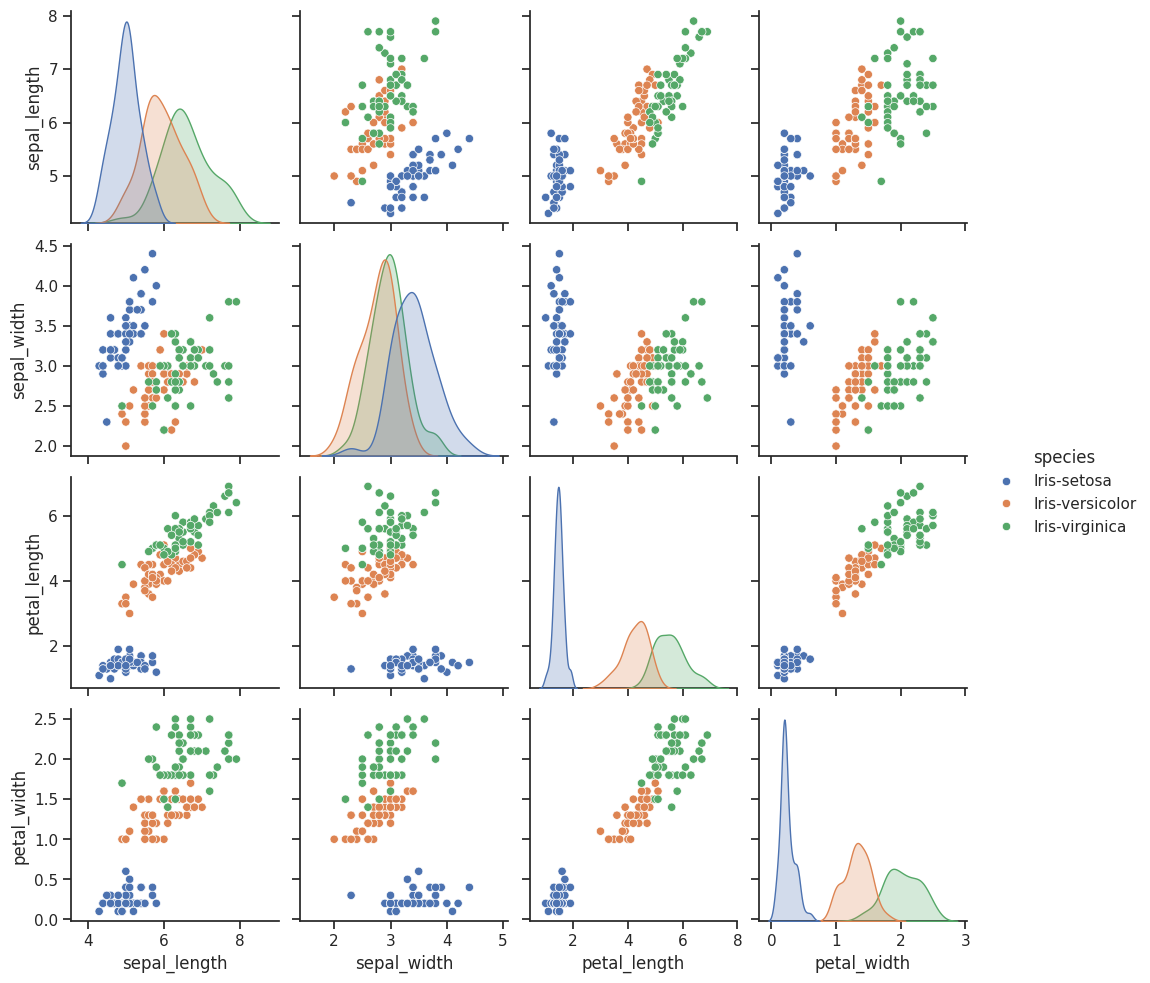

In [ ]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(iris_data, hue="species")

In the above scatter plot, we can see PetalWidthCm and PetalLengthCm has the strongest pari-wise relationship for classification. Each class are separated clearly for the pair-wise scatter plot between PetalWidthCm and PetalLengthCm

**4. Data Modeling:**

Classification problem: our goal is to predict the flow 'Species' with given 4 features: 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', and 'PetalWidthCm'.

**4.1 Train-Test Split:**

We will use Sklean to Split arrays or matrices into random train and test subsets for training and testing machine learning model.

Our X will be the features of the flowers and Y will be the label of the flowers

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# we will split data to 80% training data and 20% testing data with random seed of 10
X = iris_data.drop(['species'], axis=1)
Y = iris_data['species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [ ]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("Y_train.shape:", X_train.shape)
print("Y_test.shape:", Y_test.shape)

X_train.shape: (120, 4)
X_test.shape: (30, 4)
Y_train.shape: (120, 4)
Y_test.shape: (30,)


**4.2 Models Building**

Let's build multiple machine learning models to evaluate how they will perform on our classification problem

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

training the models and evaluate with 10-fold cross validation

In [ ]:
# models
models = []

# linear models
models.append(('LR', LogisticRegression(solver='liblinear', multi_class="auto")))
models.append(('LDA', LinearDiscriminantAnalysis()))

# nonlinear models
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma="auto")))

# evaluate each model in turn
print("Model Accuracy:")
names = []
accuracy = []
for name, model in models:
    # 10 fold cross validation to evalue model
    # Set shuffle=True to enable shuffling before splitting into folds
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

    # display the cross validation results of the current model
    names.append(name)
    accuracy.append(cv_results)
    msg = "%s: accuracy=%f std=(%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Model Accuracy:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

LR: accuracy=0.958333 std=(0.055902)
LDA: accuracy=0.975000 std=(0.038188)
CART: accuracy=0.958333 std=(0.076830)
KNN: accuracy=0.983333 std=(0.033333)
GNB: accuracy=0.966667 std=(0.040825)
SVC: accuracy=0.991667 std=(0.025000)


Let's visualize the training with Box Plot

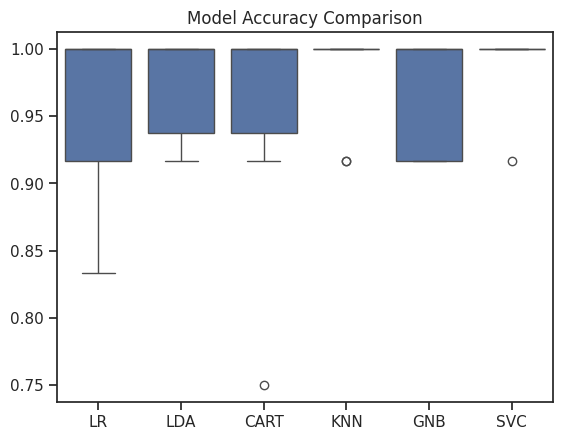

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ... (your existing code) ...

# Convert accuracy to a list of lists instead of a list of arrays
accuracy = [list(arr) for arr in accuracy]

# Reshape the data using numpy
accuracy_flat = np.array(accuracy).flatten()
names_repeated = np.repeat(names, len(accuracy[0]))  # Repeat names for each CV fold

# Create the boxplot
ax = sns.boxplot(x=names_repeated, y=accuracy_flat)
ax.set_title('Model Accuracy Comparison')
plt.show()

From above box plot, we can see the accuracy of the KNN, GNB, and SVC models has small deviation although the GNB model has a lowest accuracy score near 0.825.

Test the KNN, GNB, and SVC models with test data and output their accuracy with confusion matrix together for selecting model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma="auto")))

We will evalue the testing with accuracy score, confusion matrix, and classification report with Sklearn

In [ ]:
# reusable function to test our model
def test_model(model):
    model.fit(X_train, Y_train) # train the whole training set
    predictions = model.predict(X_test) # predict on test set

    # output model testing results
    print("Accuracy:", accuracy_score(Y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, predictions))
    print("Classification Report:")
    print(classification_report(Y_test, predictions))

In [ ]:
# predict values with our test set
for name, model in models:
    print("----------------")
    print("Testing", name)
    test_model(model)

----------------
Testing KNN
Accuracy: 0.9
Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

----------------
Testing GNB
Accuracy: 0.8333333333333334
Confusion Matrix:
[[7 0 0]
 [0 9 3]
 [0 2 9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy                           0.83        30
      macro avg       0.86      0.86      0.86        30
   wei

The highest testing accuracy is 0.93 from Support Vector Classifier

The SVC's confustion matrix has the highest diagonal values indicated that SVC predicted the class type better than the other 2 models.

From above confusion matrix and classification report, the SVC model is the best model for our classification problem.

**Conclusion:**

This kernel described and explored the classic Iris dataset with data visualizations. And we also experimented with 4 machine learning models: 2 linear and 4 non-linear models.

I examined the training results with 10-fold cross validation and chose SVC as the best model with testing confusion matrix output and classification report.